In [1]:
import cv2
import os

# Read the video from specified path
vid = cv2.VideoCapture("Track1.mp4")

try:

    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')

# if not created then raise error
except OSError:
    print('Error: Creating directory of data')

# frame
currentframe = 0

while (True):

    # reading from frame
    success, frame = vid.read()

    if success:
        # continue creating images until video remains
        name = './data/frame' + str(currentframe) + '.jpg'
        print('Creating...' + name)

        # writing the extracted images
        cv2.imwrite(name, frame)

        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break

# Release all space and windows once done
vid.release()
cv2.destroyAllWindows()

Creating..../data/frame0.jpg
Creating..../data/frame1.jpg
Creating..../data/frame2.jpg
Creating..../data/frame3.jpg
Creating..../data/frame4.jpg
Creating..../data/frame5.jpg
Creating..../data/frame6.jpg
Creating..../data/frame7.jpg
Creating..../data/frame8.jpg
Creating..../data/frame9.jpg
Creating..../data/frame10.jpg
Creating..../data/frame11.jpg
Creating..../data/frame12.jpg
Creating..../data/frame13.jpg
Creating..../data/frame14.jpg
Creating..../data/frame15.jpg
Creating..../data/frame16.jpg
Creating..../data/frame17.jpg
Creating..../data/frame18.jpg
Creating..../data/frame19.jpg
Creating..../data/frame20.jpg
Creating..../data/frame21.jpg
Creating..../data/frame22.jpg
Creating..../data/frame23.jpg
Creating..../data/frame24.jpg
Creating..../data/frame25.jpg
Creating..../data/frame26.jpg
Creating..../data/frame27.jpg
Creating..../data/frame28.jpg
Creating..../data/frame29.jpg
Creating..../data/frame30.jpg
Creating..../data/frame31.jpg
Creating..../data/frame32.jpg
Creating..../data/fr

In [2]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

In [3]:
!pip install pims
!pip install trackpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86 kB 3.0 MB/s 
  Created wheel for pims: filename=PIMS-0.6.1-py3-none-any.whl size=82635 sha256=c0aa835c0c8fccfb64de60bcf2a481ed38948f4071a298b6e499ab040979fde1
  Stored in directory: /root/.cache/pip/wheels/5c/bd/a9/9cede777cb4fcdd2ba712cdb0d0c9082aba544322eb5ad7af1
Successfully built pims
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 131 kB 5.1 MB/s 
  Created wheel for trackpy: filename=trackpy-0.5.0-py3-none-any.whl size=128767 sha256=e12a3be92fef48281fe577b98f015887def732c5db59c2769a8875c410f88314
  Stored in directory: /root/.cache/pip/wheels/f6/08/12/c940ca467827675521125cfed4a5b41dd7bb76efbbb128598d
Successfully built trackpy


In [4]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

In [5]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel
frames = gray(pims.open('data/*.jpg'))

In [6]:
frames

(ImageSequence,) processed through proc_func. Original repr:
    <Frames>
    Source: /content/data/*.jpg
    Length: 89 frames
    Frame Shape: (1080, 1920, 3)
    Pixel Datatype: uint8

Frame([[135, 135, 135, ..., 145, 145, 145],
       [135, 135, 135, ..., 145, 145, 145],
       [135, 135, 135, ..., 145, 145, 145],
       ...,
       [132, 132, 132, ..., 142, 142, 142],
       [132, 132, 132, ..., 142, 142, 142],
       [132, 132, 132, ..., 142, 142, 142]], dtype=uint8)
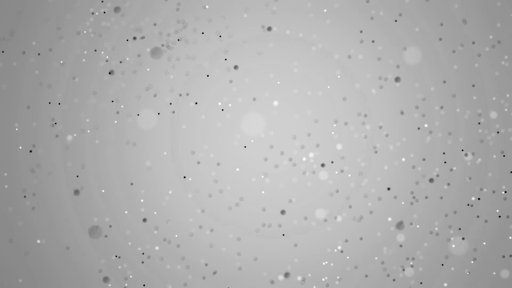

In [7]:
frames[0]

In [8]:
f = tp.locate(frames[0], 11, invert=True, minmass=20)

# **Detecting the Border of Particles**

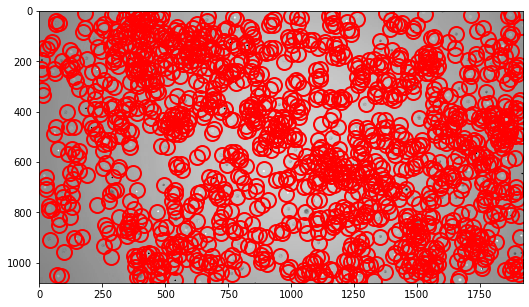

In [9]:
plt.figure()
tp.annotate(f, frames[0])

# **Detecting the Center of Particles**

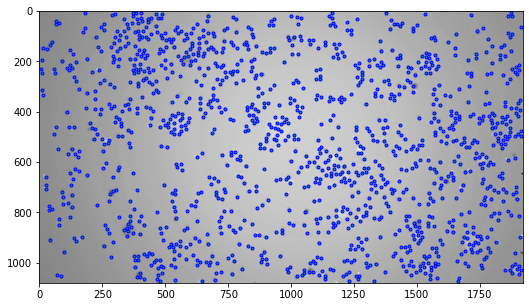

In [10]:
plt.figure()
plt.imshow(frames[0])
plt.plot(f['x'], f['y'], '.', markeredgecolor='blue')

# **Tracking the Particles**

In [19]:
f = tp.batch(frames[:300], 11, minmass=20, invert=True);

Frame 88: 1501 features


In [20]:
t = tp.link(f, 5, memory=3)
# tp.plot_traj(t)

Frame 88: 1501 trajectories present.


In [34]:
t1 = tp.filter_stubs(t,2)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 69841
After: 31894


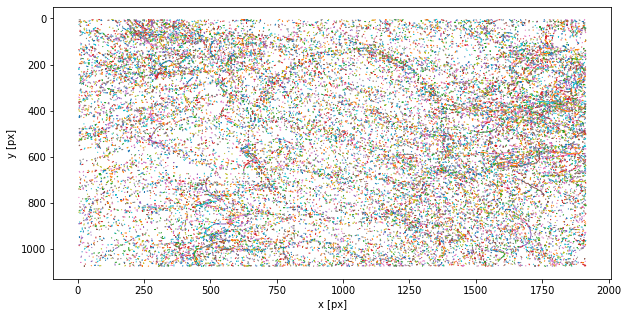

In [36]:
plt.figure()
tp.plot_traj(t);